<a href="https://colab.research.google.com/github/romulo-souza/Dashboard_Python/blob/main/Tratamento%20dos%20Dados/TratamentoDosDados.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Aula 1** - Exploração dos Dados com Pandas

Base de Dados: Salários de pessoas que trabalham na área de dados.



In [135]:
import pandas as pd

In [136]:
# Leitura da Base de Dados
df = pd.read_csv("https://raw.githubusercontent.com/romulo-souza/Dashboard_Python/refs/heads/main/Tratamento%20dos%20Dados/data_original/df_original.csv")

In [137]:
df.head()

,work_year,experience_level,employment_type,job_title,salary,salary_currency,salary_in_usd,employee_residence,remote_ratio,company_location,company_size
0,2025.0,SE,FT,Solutions Engineer,214000,USD,214000,US,100,US,M
1,2025.0,SE,FT,Solutions Engineer,136000,USD,136000,US,100,US,M
2,2025.0,MI,FT,Data Engineer,158800,USD,158800,AU,0,AU,M
3,2025.0,MI,FT,Data Engineer,139200,USD,139200,AU,0,AU,M
4,2025.0,EN,FT,Data Engineer,90000,USD,90000,US,0,US,M


In [138]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 133349 entries, 0 to 133348
Data columns (total 11 columns):
 #   Column              Non-Null Count   Dtype  
---  ------              --------------   -----  
 0   work_year           133339 non-null  float64
 1   experience_level    133349 non-null  object 
 2   employment_type     133349 non-null  object 
 3   job_title           133349 non-null  object 
 4   salary              133349 non-null  int64  
 5   salary_currency     133349 non-null  object 
 6   salary_in_usd       133349 non-null  int64  
 7   employee_residence  133349 non-null  object 
 8   remote_ratio        133349 non-null  int64  
 9   company_location    133349 non-null  object 
 10  company_size        133349 non-null  object 
dtypes: float64(1), int64(3), object(7)
memory usage: 11.2+ MB


In [139]:
df.describe() #describe traz informações resumidas da base de dados, sem passar nada por parametro, inclui apenas informações de colunas numéricas

,work_year,salary,salary_in_usd,remote_ratio
count,133339.000000,1.333490e+05,133349.000000,133349.000000
mean,2024.358770,1.632833e+05,157617.272098,20.905669
std,0.680627,2.173860e+05,74288.363097,40.590044
min,2020.000000,1.400000e+04,15000.000000,0.000000
25%,2024.000000,1.060200e+05,106000.000000,0.000000
50%,2024.000000,1.470000e+05,146206.000000,0.000000
75%,2025.000000,1.990000e+05,198000.000000,0.000000
max,2025.000000,3.040000e+07,800000.000000,100.000000


In [140]:
df.shape # retorna uma tupla (linhas, colunas)

(133349, 11)

In [141]:
linhas, colunas = df.shape
print("Linhas: ", linhas)
print("Colunas: ", colunas)

Linhas:  133349
Colunas:  11


In [142]:
df.columns

Index(['work_year', 'experience_level', 'employment_type', 'job_title',
       'salary', 'salary_currency', 'salary_in_usd', 'employee_residence',
       'remote_ratio', 'company_location', 'company_size'],
      dtype='object')

## Renomeando Colunas

In [143]:
# Dicionário de renomeação
novos_nomes = {
    'work_year': 'ano',
    'experience_level': 'senioridade',
    'employment_type': 'contrato',
    'job_title': 'cargo',
    'salary': 'salario',
    'salary_currency': 'moeda',
    'salary_in_usd': 'salario_usd',
    'employee_residence': 'residencia',
    'remote_ratio': 'regime_trabalho',
    'company_location': 'localizacao_empresa',
    'company_size': 'tamanho_empresa'
}

# Aplicando renomeação
df.rename(columns=novos_nomes, inplace=True)

# Verificando resultado
df.columns

Index(['ano', 'senioridade', 'contrato', 'cargo', 'salario', 'moeda',
       'salario_usd', 'residencia', 'regime_trabalho', 'localizacao_empresa',
       'tamanho_empresa'],
      dtype='object')

## Analisando quais sãos as categorias das colunas categóricas

In [144]:
# O método .value_counts() serve para contar quantas vezes cada valor único aparece em uma coluna. (frequência)
df['senioridade'].value_counts()

,count
senioridade,
SE,77241
MI,40465
EN,12443
EX,3200


SE (Senior) -	Profissional experiente (nível sênior)

MI (Mid) - Nível intermediário

EN (Entry) -	Iniciante ou júnior (entry-level)

EX (Executive) - Executivo, liderança sênior (C-Level)

In [145]:
df['contrato'].value_counts()

,count
contrato,
FT,132563
CT,394
PT,376
FL,16


**Significado**

FT	Full-time	(Tempo integral) – trabalho padrão de 40h/semana ou período completo

CT	Contract	(Contrato temporário ou por projeto) – geralmente por prazo determinado

PT	Part-time	(Meio período) – carga horária reduzida

FL	Freelance	(Freelancer) – trabalho autônomo ou por demanda, sem vínculo formal

In [146]:
df['regime_trabalho'].value_counts()

,count
regime_trabalho,
0,105312
100,27718
50,319


**Significado**

0 - Presencial

100 -	Remoto

50 -	Híbrido

In [147]:
df['tamanho_empresa'].value_counts()

,count
tamanho_empresa,
M,129561
L,3574
S,214


**Significado**

M	(Medium) - Empresa de tamanho médio

L	(Large) -	Empresa de tamanho grande

S	(Small) -	Empresa de tamanho pequeno

## Renomeando as categorias das colunas para nomes mais significativos

In [148]:
categorias_senioridade = {
    'SE': 'Senior',
    'MI': 'Pleno',
    'EN': 'Junior',
    'EX': 'Executivo'
}

# aplicando mudanças
df['senioridade'] = df['senioridade'].replace(categorias_senioridade)

# verificando resultado
df['senioridade'].value_counts()

,count
senioridade,
Senior,77241
Pleno,40465
Junior,12443
Executivo,3200


In [149]:
categorias_contrato = {
    'FT': 'Tempo Integral',
    'CT': 'Contrato',
    'PT': 'Tempo Parcial',
    'FL': 'Freelance'
}

df['contrato'] = df['contrato'].replace(categorias_contrato)

df['contrato'].value_counts()

,count
contrato,
Tempo Integral,132563
Contrato,394
Tempo Parcial,376
Freelance,16


In [150]:
categorias_regime_trabalho = {
    0: 'Presencial',
    100: 'Remoto',
    50: 'Hibrido'
}

df['regime_trabalho'] = df['regime_trabalho'].replace(categorias_regime_trabalho)

df['regime_trabalho'].value_counts()

,count
regime_trabalho,
Presencial,105312
Remoto,27718
Hibrido,319


In [151]:
categorias_tamanho_empresa = {
    'M': 'Media',
    'L': 'Grande',
    'S': 'Pequena'
}

df['tamanho_empresa'] = df['tamanho_empresa'].replace(categorias_tamanho_empresa)

df['tamanho_empresa'].value_counts()

,count
tamanho_empresa,
Media,129561
Grande,3574
Pequena,214


## Analisando DataFrame após todas as mudanças

In [152]:
df.head()

,ano,senioridade,contrato,cargo,salario,moeda,salario_usd,residencia,regime_trabalho,localizacao_empresa,tamanho_empresa
0,2025.0,Senior,Tempo Integral,Solutions Engineer,214000,USD,214000,US,Remoto,US,Media
1,2025.0,Senior,Tempo Integral,Solutions Engineer,136000,USD,136000,US,Remoto,US,Media
2,2025.0,Pleno,Tempo Integral,Data Engineer,158800,USD,158800,AU,Presencial,AU,Media
3,2025.0,Pleno,Tempo Integral,Data Engineer,139200,USD,139200,AU,Presencial,AU,Media
4,2025.0,Junior,Tempo Integral,Data Engineer,90000,USD,90000,US,Presencial,US,Media


In [153]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 133349 entries, 0 to 133348
Data columns (total 11 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   ano                  133339 non-null  float64
 1   senioridade          133349 non-null  object 
 2   contrato             133349 non-null  object 
 3   cargo                133349 non-null  object 
 4   salario              133349 non-null  int64  
 5   moeda                133349 non-null  object 
 6   salario_usd          133349 non-null  int64  
 7   residencia           133349 non-null  object 
 8   regime_trabalho      133349 non-null  object 
 9   localizacao_empresa  133349 non-null  object 
 10  tamanho_empresa      133349 non-null  object 
dtypes: float64(1), int64(2), object(8)
memory usage: 11.2+ MB


Podemos também resumir as informações categóricas com o método **describe()**, exibindo a quantidade de registros em cada coluna categórica, quantidade de categorias únicas, qual é categoria mais frequente (top) e sua respectiva frequência (freq):

In [154]:
df.describe(include='object') # describe em relação as colunas categóricas

,senioridade,contrato,cargo,moeda,residencia,regime_trabalho,localizacao_empresa,tamanho_empresa
count,133349,133349,133349,133349,133349,133349,133349,133349
unique,4,4,390,26,102,3,95,3
top,Senior,Tempo Integral,Data Scientist,USD,US,Presencial,US,Media
freq,77241,132563,17314,126140,119579,105312,119641,129561


In [155]:
df.describe() #describe em relação as colunas numéricas

,ano,salario,salario_usd
count,133339.000000,1.333490e+05,133349.000000
mean,2024.358770,1.632833e+05,157617.272098
std,0.680627,2.173860e+05,74288.363097
min,2020.000000,1.400000e+04,15000.000000
25%,2024.000000,1.060200e+05,106000.000000
50%,2024.000000,1.470000e+05,146206.000000
75%,2025.000000,1.990000e+05,198000.000000
max,2025.000000,3.040000e+07,800000.000000


Com isso já conseguimos responder algumas perguntas, como:

* Qual o nível de experiência mais comum na base de dados?

* Qual é o tipo de contrato mais frequente?

* Qual o cargo mais frequente na amostra?

* De qual país são a maioria dos profissionais da base?

* Qual é o país onde mais empresas da amostra estão sediadas?

* Qual o regime de trabalho mais comum?

* Qual é o tamanho mais comum das empresas na amostra?

# **Aula 2** - Preparação e limpeza dos Dados

## Valores Ausentes/Nulos

In [156]:
#Identificar valores ausentes
df.isnull() #retorna true para onde tem valores nulo e false para onde nao tem

,ano,senioridade,contrato,cargo,salario,moeda,salario_usd,residencia,regime_trabalho,localizacao_empresa,tamanho_empresa
0,False,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...
133344,False,False,False,False,False,False,False,False,False,False,False
133345,False,False,False,False,False,False,False,False,False,False,False
133346,False,False,False,False,False,False,False,False,False,False,False
133347,False,False,False,False,False,False,False,False,False,False,False


In [157]:
# Quantos valores nulos têm em cada coluna?
df.isnull().sum()

,0
ano,10
senioridade,0
contrato,0
cargo,0
salario,0
moeda,0
salario_usd,0
residencia,0
regime_trabalho,0
localizacao_empresa,0


In [158]:
# Verificando quais anos existem no DataFrame
df['ano'].unique()

array([2025.,   nan, 2024., 2022., 2023., 2020., 2021.])

In [159]:
# Em quais linhas se encontram os valores nulos?
df[df.isnull().any(axis=1)]  # filtra o DataFrame df para mostrar apenas as linhas que contêm pelo menos um valor nulo.

,ano,senioridade,contrato,cargo,salario,moeda,salario_usd,residencia,regime_trabalho,localizacao_empresa,tamanho_empresa
5588,NaN,Senior,Tempo Integral,Product Manager,184500,USD,184500,US,Presencial,US,Media
59692,NaN,Pleno,Tempo Integral,Engineer,110000,USD,110000,DE,Presencial,DE,Media
59710,NaN,Junior,Tempo Integral,Data Scientist,208800,USD,208800,US,Presencial,US,Media
59759,NaN,Senior,Tempo Integral,Software Engineer,135000,USD,135000,US,Presencial,US,Media
59789,NaN,Senior,Tempo Integral,Engineer,112000,USD,112000,US,Presencial,US,Media
131000,NaN,Senior,Tempo Integral,Machine Learning Engineer,163800,USD,163800,US,Presencial,US,Media
131006,NaN,Senior,Tempo Integral,Data Analytics Manager,204500,USD,204500,US,Presencial,US,Media
133054,NaN,Junior,Tempo Integral,Data Scientist,40000,USD,40000,JP,Remoto,MY,Grande
133281,NaN,Pleno,Tempo Integral,Machine Learning Engineer,180000,PLN,46597,PL,Remoto,PL,Grande
133317,NaN,Pleno,Tempo Integral,Data Scientist,130000,USD,130000,US,Hibrido,US,Grande


**FORMAS DE SE TRATAR VALORES AUSENTES**
* **1. Preenchimento com Valores Derivados (Imputation)**: Por exemplo, para salario: Usar a mediana ou média do salário da mesma categoria, senioridade e país.

* **2. Remover Linhas com Dados Faltantes**:
Caso a quantidade de dados nulos seja muito pequena (como neste caso, apenas 5 linhas), você pode simplesmente removê-las.

* **3. Inferência e Preenchimento com Regras de Negócio**: Preencher com base em regras claras.

**Quando usar cada estratégia:**

**Imputação inteligente:**	Quando os dados faltantes são significativos para a análise

**Remoção de linhas:**	Quando o volume de nulos é pequeno e não afeta o dataset

**Preenchimento baseado em regra:**	Quando há lógica ou negócio claro para inferir o valor




## Exemplos fictícios

In [160]:
import numpy as np

# Exemplo de preenchimento com média e mediana
'''Criação de uma base de teste. Para criar um dataframe passa-se um dicionário,
onde as keys são as colunas e os values são listas contendo os dados de cada coluna,
na mesma ordem das linhas'''

df_salarios = pd.DataFrame({
    "nome": ["Ana", "Bruno", "Carlos", "Daniele", "Lucas"],
    "salario": [4000, np.nan, 5000, np.nan, 100000]
})

# Preencher valores nulos com media ou mediana e arredonda. Nesse caso criou-se uma nova coluna, mas poderia ser feito direto na coluna salario
df_salarios["salario_media"] = df_salarios["salario"].fillna(df_salarios["salario"].mean().round(2)) #média é ideal usar quando os valores de uma coluna nao possuem um outlier grande (distribuição simétrica)
df_salarios["salario_mediana"] = df_salarios["salario"].fillna(df_salarios["salario"].median()) #mediana ideal para quando os valores de uma determinada coluna possuem outliers significativos (distribuição assimétrica)


In [161]:
df_salarios

,nome,salario,salario_media,salario_mediana
0,Ana,4000.0,4000.00,4000.0
1,Bruno,NaN,36333.33,5000.0
2,Carlos,5000.0,5000.00,5000.0
3,Daniele,NaN,36333.33,5000.0
4,Lucas,100000.0,100000.00,100000.0


In [162]:
# exemplo de prrenchimento com o valor anterior
df_temperaturas = pd.DataFrame({
    "dia": ["Segunda", "Terça", "Quarta", "Quinta", "Sexta"],
    "temperatura": [30, np.nan, np.nan, 28, 27]
})

df_temperaturas["preenchido_ffill"] = df_temperaturas["temperatura"].ffill() #preenche com o valor válido anterior, preenche para frente (foward fill)
df_temperaturas


,dia,temperatura,preenchido_ffill
0,Segunda,30.0,30.0
1,Terça,NaN,30.0
2,Quarta,NaN,30.0
3,Quinta,28.0,28.0
4,Sexta,27.0,27.0


In [163]:
# exemplo de prenchimento com o valor anterior
df_temperaturas = pd.DataFrame({
    "dia": ["Segunda", "Terça", "Quarta", "Quinta", "Sexta"],
    "temperatura": [30, np.nan, np.nan, 28, 27]
})

df_temperaturas["preenchido_bfill"] = df_temperaturas["temperatura"].bfill() #preenche com o próximo valor válido encontrado, prrenche para tras (backward fill)
df_temperaturas

,dia,temperatura,preenchido_bfill
0,Segunda,30.0,30.0
1,Terça,NaN,28.0
2,Quarta,NaN,28.0
3,Quinta,28.0,28.0
4,Sexta,27.0,27.0


In [164]:
# exemplo de preenchimento com valor fixo
df_cidades = pd.DataFrame({
    "nome": ["Ana", "Bruno", "Carlos", "Daniele", "Lucas"],
    "cidade": ["São Paulo", np.nan , "Curitiba", np.nan, "Belém"]
})

df_cidades["cidade_preenchida"] = df_cidades["cidade"].fillna("Não Informado")
df_cidades


,nome,cidade,cidade_preenchida
0,Ana,São Paulo,São Paulo
1,Bruno,NaN,Não Informado
2,Carlos,Curitiba,Curitiba
3,Daniele,NaN,Não Informado
4,Lucas,Belém,Belém


## Tratando o nosso DataFrame

In [165]:
# É uma boa prática tratar os dados do dataframe em uma cópia do original, assim não perdemos o dataframe original
df_tratado = df.copy()


In [166]:
# Como nesse caso temos bastantes registros e apenas 10 estão com o valor ano nulo, podemos excluir os valores ausentes sem prejudicar a análise
df_tratado = df_tratado.dropna() #Obs: também dá para especificar a coluna, com dropna(subset=['nome da coluna'])

In [167]:
df_tratado.isnull().sum()

,0
ano,0
senioridade,0
contrato,0
cargo,0
salario,0
moeda,0
salario_usd,0
residencia,0
regime_trabalho,0
localizacao_empresa,0


In [168]:
df_tratado.info()

<class 'pandas.core.frame.DataFrame'>
Index: 133339 entries, 0 to 133348
Data columns (total 11 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   ano                  133339 non-null  float64
 1   senioridade          133339 non-null  object 
 2   contrato             133339 non-null  object 
 3   cargo                133339 non-null  object 
 4   salario              133339 non-null  int64  
 5   moeda                133339 non-null  object 
 6   salario_usd          133339 non-null  int64  
 7   residencia           133339 non-null  object 
 8   regime_trabalho      133339 non-null  object 
 9   localizacao_empresa  133339 non-null  object 
 10  tamanho_empresa      133339 non-null  object 
dtypes: float64(1), int64(2), object(8)
memory usage: 12.2+ MB


In [169]:
# Converter ano para int
'''Podemos usar assign() para retornar um novo DataFrame com a modificação
ou fazer direto com df_tratado["ano"] = df_tratado["ano"].astype(int) que modifica
a coluna diretamente no DataFrame original.
'''
df_tratado = df_tratado.assign(ano = df_tratado['ano'].astype('int64'))


In [170]:
df_tratado.info()

<class 'pandas.core.frame.DataFrame'>
Index: 133339 entries, 0 to 133348
Data columns (total 11 columns):
 #   Column               Non-Null Count   Dtype 
---  ------               --------------   ----- 
 0   ano                  133339 non-null  int64 
 1   senioridade          133339 non-null  object
 2   contrato             133339 non-null  object
 3   cargo                133339 non-null  object
 4   salario              133339 non-null  int64 
 5   moeda                133339 non-null  object
 6   salario_usd          133339 non-null  int64 
 7   residencia           133339 non-null  object
 8   regime_trabalho      133339 non-null  object
 9   localizacao_empresa  133339 non-null  object
 10  tamanho_empresa      133339 non-null  object
dtypes: int64(3), object(8)
memory usage: 12.2+ MB


# **Aula 3** - Visualização de Dados
Criação de gráficos estatísticos para explorar e comunicar informações presentes nos dados

In [171]:
df_tratado.head()

,ano,senioridade,contrato,cargo,salario,moeda,salario_usd,residencia,regime_trabalho,localizacao_empresa,tamanho_empresa
0,2025,Senior,Tempo Integral,Solutions Engineer,214000,USD,214000,US,Remoto,US,Media
1,2025,Senior,Tempo Integral,Solutions Engineer,136000,USD,136000,US,Remoto,US,Media
2,2025,Pleno,Tempo Integral,Data Engineer,158800,USD,158800,AU,Presencial,AU,Media
3,2025,Pleno,Tempo Integral,Data Engineer,139200,USD,139200,AU,Presencial,AU,Media
4,2025,Junior,Tempo Integral,Data Engineer,90000,USD,90000,US,Presencial,US,Media


## Gráficos não interativos

#

<Axes: title={'center': 'Distribuição de Senioridade'}, xlabel='senioridade'>

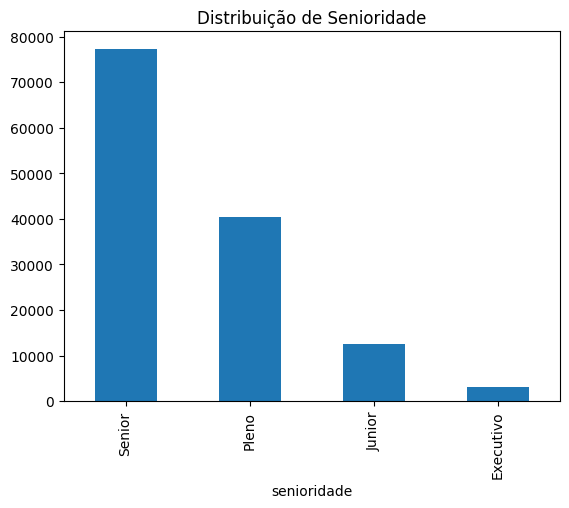

In [172]:
# plotando um grafico de barras simples com a biblioteca pandas em relação a contagem de valores da coluna senioridade
df_tratado['senioridade'].value_counts().plot(kind='bar', title='Distribuição de Senioridade')

In [173]:
#importando a biblioteca seaborn (mais ideal para visualização dos dados)
import seaborn as sns

<Axes: xlabel='senioridade', ylabel='salario_usd'>

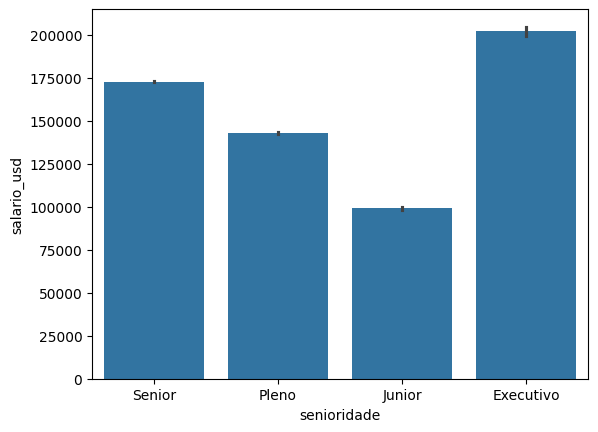

In [174]:
#Salário médio por senioridade
# O barplot do Seaborn já agrupa os valores de y (salario_usd) por x (senioridade).
# Por padrão, o parâmetro estimator é "mean" (média), mas pode ser alterado.
sns.barplot(data = df_tratado, x = 'senioridade', y = 'salario_usd', estimator = "mean")

In [175]:
# para personalizar o gráfico (titulos, etc) pode-se utilizar o matplotlib
import matplotlib.pyplot as plt

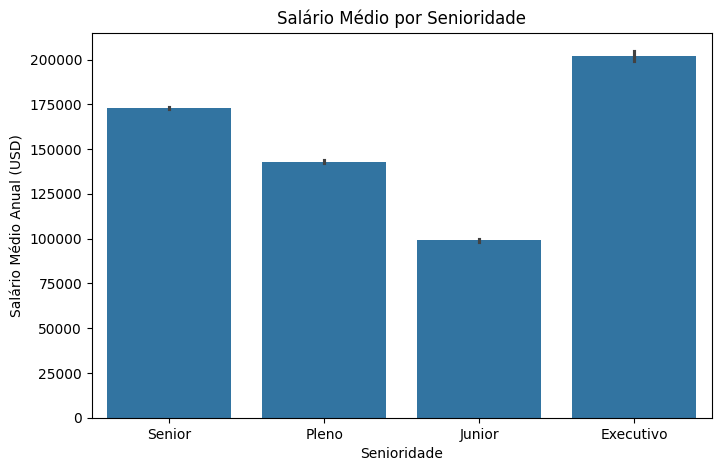

In [176]:
#1º passo: Definir o tamanho da figura
plt.figure(figsize=(8,5)) #(largura, altura)

#2º passo: Definir o conteúdo da figura
sns.barplot(data = df_tratado, x = 'senioridade', y = 'salario_usd', estimator = "mean")

#3º passo: incluir informações para melhorar a visualização
plt.title("Salário Médio por Senioridade")
plt.xlabel("Senioridade")
plt.ylabel("Salário Médio Anual (USD)")
plt.show()

In [177]:
# Deixando os gráfico em ordem descendente
# usando o groupby do pandas, primeiro se passa o coluna que se quer agrupar entre parenteses, e depois a coluna que possui os valores numéricos a serem agrupados por alguma função estatística entre colchetes
df_tratado.groupby('senioridade')['salario_usd'].mean().sort_values(ascending=False)

,salario_usd
senioridade,
Executivo,202027.667813
Senior,172850.838301
Pleno,143044.845979
Junior,99034.963267


In [178]:
# Armazenar o groupby ordenado em uma variavel para passar como parametro no seaborn
agrupamento_senioridade_ordem = df_tratado.groupby('senioridade')['salario_usd'].mean().sort_values(ascending=False).index # o .index é o objeto que contém os rótulos (as senioridades) do resultado, na ordem definida.
agrupamento_senioridade_ordem

Index(['Executivo', 'Senior', 'Pleno', 'Junior'], dtype='object', name='senioridade')

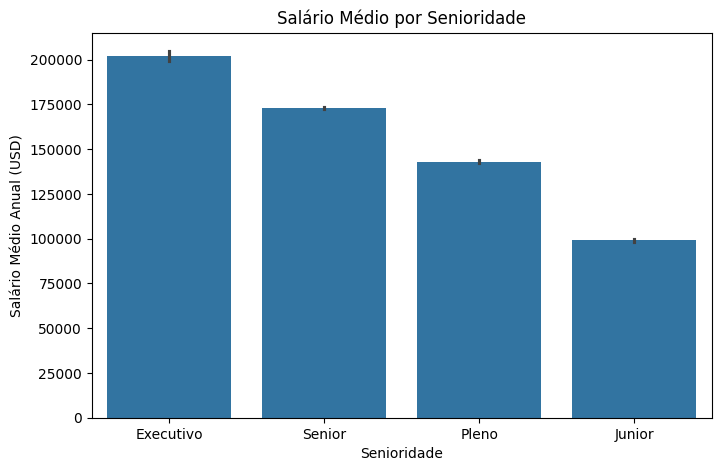

In [179]:
# Finalmente, podemos ter o seguinte gráfico:
plt.figure(figsize=(8,5))
sns.barplot(data = df_tratado, x = 'senioridade', y = 'salario_usd', estimator = "mean", order = agrupamento_senioridade_ordem)
plt.title("Salário Médio por Senioridade")
plt.xlabel("Senioridade")
plt.ylabel("Salário Médio Anual (USD)")
plt.show()

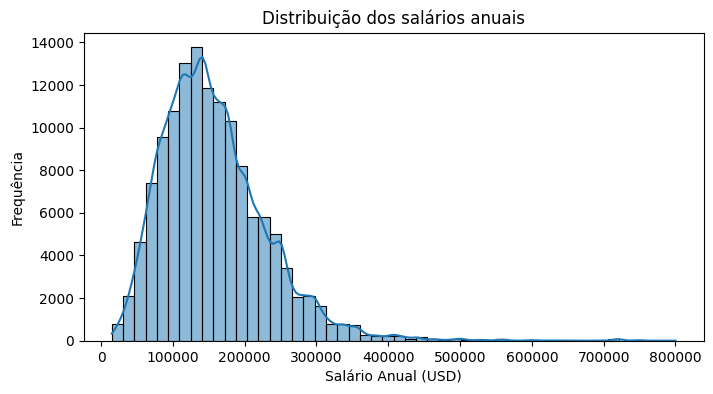

In [180]:
# Plotando um histograma do salario para analisar a distribuição salarial
plt.figure(figsize=(8,4))
sns.histplot(df_tratado['salario_usd'], bins = 50, kde = True)
plt.title("Distribuição dos salários anuais")
plt.xlabel("Salário Anual (USD)")
plt.ylabel("Frequência")
plt.show()

**HISTOGRAMA**

* **Visualizar a Distribuição:** Mostra a forma geral dos dados, como eles estão espalhados, onde estão concentrados e se são simétricos ou assimétricos.

* **Identificar a Moda:** Localiza o valor ou a faixa de valores que ocorre com mais frequência (barra mais alta).

* **Encontrar Outliers:** Permite identificar valores extremos ou atípicos, que aparecem como barras isoladas ou uma cauda longa.

* **Avaliar Normalidade:** Serve como um guia visual rápido para verificar se seus dados seguem a importante curva de sino (distribuição normal).

**sns.histplot()** -> primeiro parametro é a coluna a ser analisada

**bins** -> define em quantos “intervalos” ou “caixas” serão divididos os dados para o histograma. Cada barrinha azul representa um "bin". Quanto maior o valor, mais detalhado/granular fica, o ideal é testar e achar um bom valor que seja possível de se visualizar.

**kde** -> Kernel Density Estimate (Estimativa de Densidade por Núcleo).
Ela serve para suavizar a distribuição e dar uma ideia mais contínua da forma da distribuição dos dados

Analisando o histograma, é possível concluir que a a maioria dos funcionários possuem um salário anual entre 100k e 200k de doláres, sendo um histograma distorcido à direita (ou com cauda à direita), indicando que a ocorrência de altos valores possuem menor frequência.

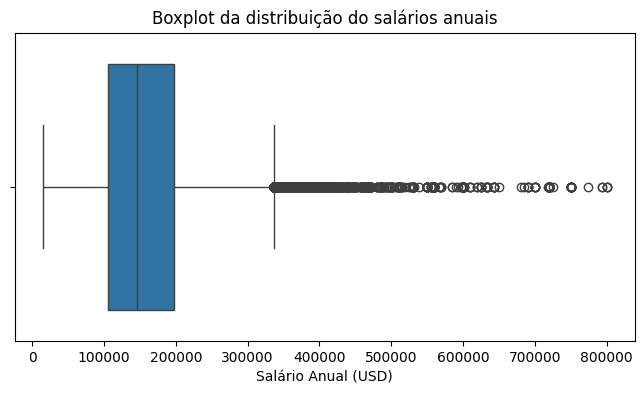

In [181]:
# Plotando o gráfico Boxplot
plt.figure(figsize=(8,4))
sns.boxplot(x = df_tratado['salario_usd']) # orientação pode ser eixo x ou y
plt.title("Boxplot da distribuição do salários anuais")
plt.xlabel("Salário Anual (USD)")
plt.show()

O mínimo e o máximo que aparecem no boxplot normalmente são os menores e maiores valores dentro de um limite aceitável (sem serem outliers).

Esses limites são calculados usando os quartis e o intervalo interquartil (IQR = Q3 - Q1).

Os pontos fora da extremidade direita são outliers, ou seja, valores que estão fora desse limite, valores discrepantes

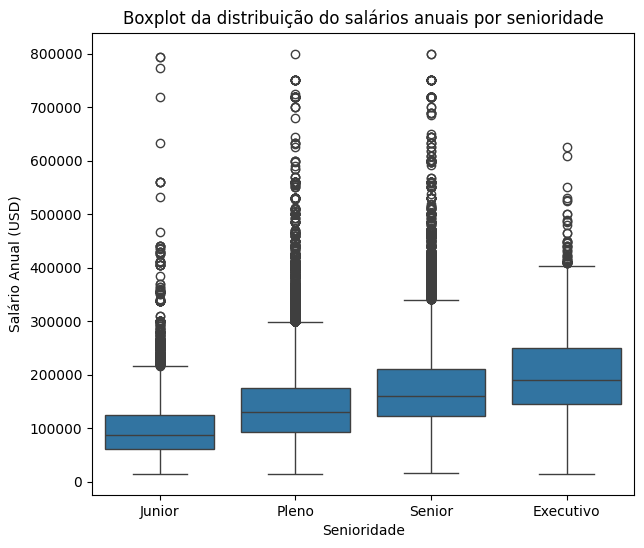

In [182]:
#Boxplot da distribuição dos salários anuais por senioridade
ordem_senioridade = ['Junior', 'Pleno', 'Senior', 'Executivo']
plt.figure(figsize=(7,6))
sns.boxplot(data = df_tratado, x = 'senioridade', y = 'salario_usd', order = ordem_senioridade) #pode passar o dataframe em data e depois especificar as colunas em x e y, ou especificar direto a coluna no dataframe com df['coluna']. Porém para usar o parâmetro order é preciso ter o data para o Seaborn ter a referência do DataFrame para ordenar as categorias.
plt.title("Boxplot da distribuição do salários anuais por senioridade")
plt.xlabel("Senioridade")
plt.ylabel("Salário Anual (USD)")
plt.show()

In [183]:
#Exemplo de consulta com mais de um filtro no pandas
resultado = df_tratado[(df_tratado['senioridade'] == 'Junior') & (df_tratado['salario_usd'] >= 750000)]
resultado

,ano,senioridade,contrato,cargo,salario,moeda,salario_usd,residencia,regime_trabalho,localizacao_empresa,tamanho_empresa
53266,2025,Junior,Tempo Integral,Data Engineer,753480,EUR,793136,AT,Presencial,AT,Media
53267,2025,Junior,Tempo Integral,Data Engineer,753480,EUR,793136,AT,Presencial,AT,Media
120462,2024,Junior,Tempo Integral,Data Analyst,774000,USD,774000,MX,Presencial,MX,Media


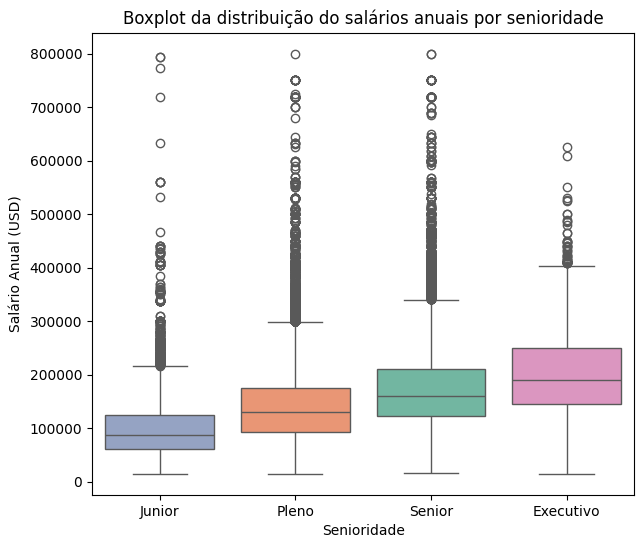

In [184]:
# mudando a cor do boxplot para cada categoria de senioridade, paleta 'Set2' e hue coloca uma cor para cada categoria da variável especificada para ele
ordem_senioridade = ['Junior', 'Pleno', 'Senior', 'Executivo']
plt.figure(figsize=(7,6))
sns.boxplot(data = df_tratado, x = 'senioridade', y = 'salario_usd', order = ordem_senioridade, palette = 'Set2', hue = 'senioridade') #pode passar o dataframe em data e depois especificar as colunas em x e y, ou especificar direto a coluna no dataframe com df['coluna']. Porém para usar o parâmetro order é preciso ter o data para o Seaborn ter a referência do DataFrame para ordenar as categorias.
plt.title("Boxplot da distribuição do salários anuais por senioridade")
plt.xlabel("Senioridade")
plt.ylabel("Salário Anual (USD)")
plt.show()

## Gráficos interativos

Usar a biblioteca Plotly, mais especificamente o modulo express

In [185]:
import plotly.express as px

In [186]:
# Gráfico de média salarial por senioridade
senioridade_media_salario = df_tratado.groupby('senioridade')['salario_usd'].mean().sort_values(ascending=False).reset_index() # o reset_index() transforma o índice (que é a senioridade) em uma coluna normal, e cria um índice numérico padrão (0, 1, 2, ...).
senioridade_media_salario

,senioridade,salario_usd
0,Executivo,202027.667813
1,Senior,172850.838301
2,Pleno,143044.845979
3,Junior,99034.963267


In [187]:
# Criando o gráfico de barras com plotly
fig = px.bar(
    senioridade_media_salario, #conteúdo do gráfico (dados)
    x='senioridade',
    y='salario_usd',
    title='Salário Médio por Senioridade',
    labels={'senioridade': 'Senioridade', 'salario_usd': 'Salário Médio Anual (USD)'},
    width=750,
    height=500
)
fig.show()

In [188]:
#maiores salários médios anuais por cargo (top 10)
top_cargos = df_tratado.groupby('cargo')['salario_usd'].mean().nlargest(10).sort_values(ascending=True).reset_index()
fig = px.bar(
    top_cargos,
    x='salario_usd',
    y='cargo',
    orientation='h',
    title='Top 10 Cargos por Salário Médio Anual',
    labels={'salario_usd': 'Salário Médio Anual (USD)', 'cargo': 'Cargo'},
)
fig.update_layout(title_x = 0.5, yaxis = {'categoryorder': 'total ascending'}) #title_x move o titulo sobre o eixo x, yaxis controla a ordem de exibição das categorias no eixo Y (crescente)
fig.show()



In [189]:
# Gráfico de pizza para a frequência de regime de trabalho
regime_trabalho_contagem = df_tratado['regime_trabalho'].value_counts().reset_index()
regime_trabalho_contagem




,regime_trabalho,count
0,Presencial,105305
1,Remoto,27716
2,Hibrido,318


In [190]:
# Renomeando o nome das colunas geradas pela contagem
regime_trabalho_contagem.columns = ['regime_trabalho', 'quantidade']

# Criando o gráfico de pizza
fig = px.pie(
    regime_trabalho_contagem, #conteúdo do gráfico (dados)
    names = 'regime_trabalho', #rótulos das categorias
    values = 'quantidade', #valores numéricos
    title = 'Proporção dos Regimes de Trabalho',
    width = 700,
    height = 400
)

#mostrar porcentagem + rótulo da categoria
fig.update_traces(textinfo='percent+label')
fig.show()


In [191]:
# Criando o gráfico de rosca
fig = px.pie(
    regime_trabalho_contagem, #conteúdo do gráfico (dados)
    names = 'regime_trabalho', #rótulos das categorias
    values = 'quantidade', #valores numéricos
    title = 'Proporção dos Regimes de Trabalho',
    hole = 0.5,
    width = 700,
    height= 400
)

#mostrar porcentagem + rótulo da categoria
fig.update_traces(textinfo='percent+label')
fig.show()

In [192]:
# Agrupar media salarial anual por pais por cargo de cientista de dados
# Criar mapa usando plotly, mas para isso precisa das siglas do países com 3 letras (ISO-3)

#biblioteca para conversão de siglas
!pip install pycountry

In [193]:
import pycountry

#função para converter ISO-2 para ISO-3
def iso2_to_iso3(country_code):
  try:
    return pycountry.countries.get(alpha_2=country_code).alpha_3
  except:
    return None
# Criar uma nova coluna com codigo ISO-3. apply() aplica uma função em todas as linhas de uma coluna do dataframe
df_tratado['residencia_iso3'] = df_tratado['residencia'].apply(iso2_to_iso3)

# Agrupar media salarial anual por pais por cargo de cientista de dados
media_salario_pais_CD = (
    df_tratado[df_tratado['cargo'] == 'Data Scientist'] #faz o filtro de cargo primeiro
    .groupby(['residencia_iso3', 'cargo'])['salario_usd'] #  e depois faz o agrupamento, nesse caso bastava agrupar por 'residencia', porem colocando 'cargo' é mostrado essa coluna no dataframe resultante
    .mean()
    .sort_values(ascending=False)
    .reset_index()
)

media_salario_pais_CD

,residencia_iso3,cargo,salario_usd
0,USA,Data Scientist,162802.494603
1,SGP,Data Scientist,152522.714286
2,BGR,Data Scientist,152500.000000
3,CHE,Data Scientist,152256.666667
4,EGY,Data Scientist,140690.909091
5,CAN,Data Scientist,140519.984762
6,MEX,Data Scientist,140466.666667
7,NZL,Data Scientist,122929.750000
8,JPN,Data Scientist,121766.666667
9,AUS,Data Scientist,112190.000000


In [194]:
# Gerar o mapa
fig = px.choropleth(
    media_salario_pais_CD,
    locations = 'residencia_iso3',
    color = 'salario_usd', # a cor de cada país vai depender do valor do salário médio.
    color_continuous_scale = 'rdylgn', # a escala de cores usada será vermelho -> amarelo -> verde, indicando valores baixos a altos.
    title = 'Salário médio anual de Cientista de Dados por País',
    labels={'salario_usd': 'Salário médio anual (USD)', 'residencia_iso3': 'País'},
    hover_name = 'residencia_iso3'
)
fig.show()

In [195]:
df_tratado.head()

,ano,senioridade,contrato,cargo,salario,moeda,salario_usd,residencia,regime_trabalho,localizacao_empresa,tamanho_empresa,residencia_iso3
0,2025,Senior,Tempo Integral,Solutions Engineer,214000,USD,214000,US,Remoto,US,Media,USA
1,2025,Senior,Tempo Integral,Solutions Engineer,136000,USD,136000,US,Remoto,US,Media,USA
2,2025,Pleno,Tempo Integral,Data Engineer,158800,USD,158800,AU,Presencial,AU,Media,AUS
3,2025,Pleno,Tempo Integral,Data Engineer,139200,USD,139200,AU,Presencial,AU,Media,AUS
4,2025,Junior,Tempo Integral,Data Engineer,90000,USD,90000,US,Presencial,US,Media,USA


In [196]:
# Exemplo de consulta multiplos filtros, no caso top 10  salario de seniors no ano de 2025 cujo cargo não seja data scientist
top_salarios_senior_CD = (
    df_tratado[(df_tratado['senioridade'] == 'Senior') & #cada filtro deve estar entre (). no pandas, & (and), | (or), ~ (not)
               (df_tratado['ano'] == 2025) &
               ~(df_tratado['cargo'] == 'Data Scientist')
    ].nlargest(10, 'salario_usd')
)
top_salarios_senior_CD


,ano,senioridade,contrato,cargo,salario,moeda,salario_usd,residencia,regime_trabalho,localizacao_empresa,tamanho_empresa,residencia_iso3
12788,2025,Senior,Tempo Integral,Architect,800000,USD,800000,US,Presencial,US,Media,USA
36155,2025,Senior,Tempo Integral,Software Engineer,800000,USD,800000,US,Presencial,US,Media,USA
1839,2025,Senior,Tempo Integral,Machine Learning Scientist,750000,USD,750000,US,Remoto,US,Media,USA
18257,2025,Senior,Tempo Integral,Machine Learning Engineer,750000,USD,750000,US,Remoto,US,Media,USA
20620,2025,Senior,Tempo Integral,Machine Learning Scientist,750000,USD,750000,US,Remoto,US,Media,USA
26070,2025,Senior,Tempo Integral,Machine Learning Engineer,750000,USD,750000,US,Remoto,US,Media,USA
34421,2025,Senior,Tempo Integral,Software Engineer,750000,USD,750000,US,Presencial,US,Media,USA
36157,2025,Senior,Tempo Integral,Software Engineer,750000,USD,750000,US,Presencial,US,Media,USA
38633,2025,Senior,Tempo Integral,Machine Learning Engineer,750000,USD,750000,US,Remoto,US,Media,USA
43244,2025,Senior,Tempo Integral,Machine Learning Scientist,750000,USD,750000,US,Remoto,US,Media,USA


# Exportando o DataFrame tratado para ser utilizado na criação do Dashboard

In [197]:
df_tratado.to_csv('df_tratado.csv', index=False) # index falso para que o índice do DataFrame não seja salvo como uma coluna no CSV